In [1]:
using PyPlot
using PorousMaterials

In [2]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('ggplot')
# import numpy as np

In [3]:
PyPlot.matplotlib.style.use("ggplot")

In [4]:
xtal_experiment      = Crystal("NiPyC2_experiment.cif")
xtal_pbesol_vcrelax  = Crystal("NiPyC2_vc-relax.cif")
xtal_pbesol_angrelax = Crystal("NiPyC2_pbesol-angle-vc-relax.cif")
xtal_vdw_vcrelax     = Crystal("NiPyC2_vdw-df2_vc-relax.cif")

┌ Info: Crystal NiPyC2_experiment.cif has Pn space group. I am converting it to P1 symmetry.
│         To afrain from this, pass `convert_to_p1=false` to the `Crystal` constructor.
└ @ PorousMaterials /home/ng/.julia/dev/PorousMaterials/src/crystal.jl:426


Name: NiPyC2_vdw-df2_vc-relax.cif
Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 91.195882 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 6.844737 Å. b = 12.878553 Å, c = 10.905116 Å
	Volume of unit cell: 961.079954 Å³

	# atoms = 54
	# charges = 0
	chemical formula: Dict(:C10 => 1,:C22 => 1,:H3 => 1,:C13 => 1,:H13 => 1,:H4 => 1,:C16 => 1,:C14 => 1,:H1 => 1,:C19 => 1…)
	space Group: P1
	symmetry Operations:
		'x, y, z'


In [5]:
xtal_experiment.box

Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 91.269000 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 6.252800 Å. b = 12.523400 Å, c = 10.276800 Å
	Volume of unit cell: 804.540972 Å³


In [6]:
xtal_pbesol_vcrelax.box

Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 91.370820 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 6.798460 Å. b = 10.761410 Å, c = 11.188340 Å
	Volume of unit cell: 818.316049 Å³


In [7]:
xtal_pbesol_angrelax.box

Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 90.935238 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 6.784741 Å. b = 10.808086 Å, c = 11.181192 Å
	Volume of unit cell: 819.808300 Å³


In [8]:
xtal_vdw_vcrelax.box

Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 91.195882 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 6.844737 Å. b = 12.878553 Å, c = 10.905116 Å
	Volume of unit cell: 961.079954 Å³


In [9]:
N = 3 # number of lattice params per xtal

# conversion factor: 0.529177 bohr --> ang 

# create a dictionary to store lattice constants
lattice_constants = Dict{String, Tuple{Float64,Float64,Float64}}()

# experimental
lattice_constants["experimental"] = (xtal_experiment.box.a, 
    xtal_experiment.box.b, xtal_experiment.box.c)

# vc-relax (Å)
lattice_constants["pbesol_vc-relax"] = (xtal_pbesol_vcrelax.box.a, 
    xtal_pbesol_vcrelax.box.b, xtal_pbesol_vcrelax.box.c)

# angle-vc-relax
lattice_constants["pbesol_angle-relax"] = (xtal_pbesol_angrelax.box.a, 
    xtal_pbesol_angrelax.box.b, xtal_pbesol_angrelax.box.c)

lattice_constants["vdw_vc-relax"] = (xtal_vdw_vcrelax.box.a,
    xtal_vdw_vcrelax.box.b, xtal_vdw_vcrelax.box.c)

(6.844737, 12.878553, 10.905116)

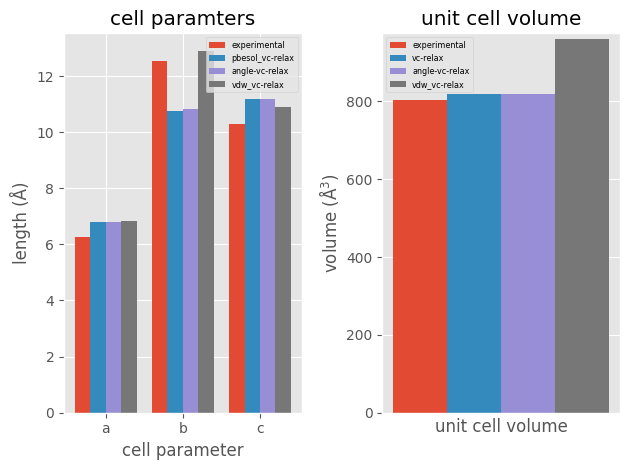

In [21]:
fig, axs = plt.subplots(1, 2)
ind = collect(1:N) 
width = 0.2       

axs[1].bar(ind, lattice_constants["experimental"], width,
    label="experimental")
axs[1].bar(ind .+ width, lattice_constants["pbesol_vc-relax"], width,
    label="pbesol_vc-relax")
axs[1].bar(ind .+ 2*width, lattice_constants["pbesol_angle-relax"], width,
    label="angle-vc-relax")
axs[1].bar(ind .+ 3*width, lattice_constants["vdw_vc-relax"], width,
    label="vdw_vc-relax")

axs[1].set_ylabel("length (Å)")
axs[1].set_xlabel("cell parameter")
axs[1].set_title("cell paramters")

# axs[1].set_xticks(ind .+ width / 2)
axs[1].set_xticks(ind .+ width * 1.5)

axs[1].set_xticklabels(["a", "b", "c"])
axs[1].legend(loc="best", fontsize="xx-small")

ind = collect(1:1)
axs[2].bar(ind, xtal_experiment.box.Ω, width,
    label="experimental")
axs[2].bar(ind .+ width, xtal_pbesol_vcrelax.box.Ω, width,
    label="vc-relax")
axs[2].bar(ind .+ 2*width, xtal_pbesol_angrelax.box.Ω, width,
    label="angle-vc-relax")
axs[2].bar(ind .+ 3*width, xtal_vdw_vcrelax.box.Ω, width,
    label="vdw_vc-relax")

axs[2].set_ylim(ymax=975)
axs[2].set_xticks([])
axs[2].set_ylabel(L"volume (Å$^3$)")
axs[2].set_xlabel("unit cell volume")
axs[2].set_title("unit cell volume")
axs[2].legend(loc="best", fontsize="xx-small")


# suptitle(L"NiPyC$_2$")
tight_layout()
# axs[1].show()
# savefig("NiPyC2_lattice_constant_comparison.pdf", dpi=300, format="pdf")